# Example of a fixed-point integrator model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qformatpy import qformat as qfmt
from qformatpy.constants import SAT, TRUNC

The goal is to implement the fixed-point integrator of this block diagram:
![block diagram](./integrator_block_diagram.drawio.png)

We will start by implementing the integrator as a function:

In [2]:
def integrator(x: np.ndarray) -> np.ndarray:
    """Example of a simple fixed-point integrator."""

    len_x = len(x)

    # convert float input to sQ4.5 and saturation
    # qformat accepts receiving numpy arrays
    x_qfmt = qfmt(x, 4, 5, rnd_method=TRUNC, ovf_method=SAT)

    # implement accumulator
    acc = 0
    y = np.zeros(n_smp)
    for i in range(len_x):

        # Adder output
        y[i] = acc + x[i]

        # The accumulator register is 13 bits, with 
        # fixed-point format of sQ7.6. The default overflow
        # method is WRAP.
        acc = qfmt(y[i], 7, 5)

    return y

The input stimulus will be a DC signal with value of 1. A fixed-point integrator is expected to overflow for a DC signal.

In [3]:
# number of samples used for the simulation
n_smp = 2**18

# DC value of 5 + Gaussian noise
x = np.ones(n_smp)
y = integrator(x)

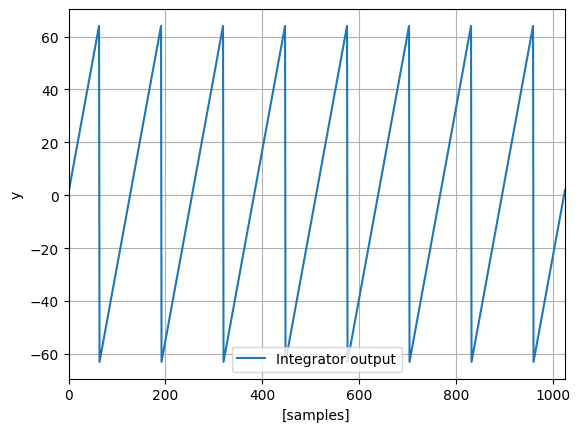

In [4]:
fig, ax = plt.subplots()
ax.plot(y, label="Integrator output")
ax.set_xlim([0, 1024])
ax.set_xlabel("[samples]")
ax.set_ylabel("y")
ax.legend()
plt.grid()
plt.show()